In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data = pd.read_csv("Downloads\_d21b2085472fd467f689f21cd421b13b_tree_addhealth.csv")

#upper-case all DataFrame column names
data.columns = map(str.upper, data.columns)

# Data Management

data_clean = data.dropna()

In [3]:
cluster=data_clean[['ALCEVR1','MAREVER1','ALCPROBS1','DEVIANT1','VIOL1',
'DEP1','ESTEEM1','SCHCONN1','PARACTV', 'PARPRES','FAMCONCT']]
cluster.describe()

,ALCEVR1,MAREVER1,ALCPROBS1,DEVIANT1,VIOL1,DEP1,ESTEEM1,SCHCONN1,PARACTV,PARPRES,FAMCONCT
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,0.527432,0.241967,0.369180,2.645027,1.618579,8.537049,40.952131,28.360656,6.290710,13.398033,22.570557
std,0.499302,0.428321,0.894947,3.520554,2.593230,6.571052,5.381439,5.156385,3.360219,2.085837,2.614754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,6.000000,0.000000,3.000000,6.300000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,38.000000,25.000000,4.000000,12.000000,21.700000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,7.000000,40.000000,29.000000,6.000000,14.000000,23.700000
75%,1.000000,0.000000,0.000000,4.000000,2.000000,12.000000,45.000000,32.000000,9.000000,15.000000,24.300000
max,1.000000,1.000000,6.000000,27.000000,19.000000,48.000000,50.000000,38.000000,18.000000,15.000000,25.000000


In [4]:
clustervar=cluster.copy()
clustervar['ALCEVR1']=preprocessing.scale(clustervar['ALCEVR1'].astype('float64'))
clustervar['ALCPROBS1']=preprocessing.scale(clustervar['ALCPROBS1'].astype('float64'))
clustervar['MAREVER1']=preprocessing.scale(clustervar['MAREVER1'].astype('float64'))
clustervar['DEP1']=preprocessing.scale(clustervar['DEP1'].astype('float64'))
clustervar['ESTEEM1']=preprocessing.scale(clustervar['ESTEEM1'].astype('float64'))
clustervar['VIOL1']=preprocessing.scale(clustervar['VIOL1'].astype('float64'))
clustervar['DEVIANT1']=preprocessing.scale(clustervar['DEVIANT1'].astype('float64'))
clustervar['FAMCONCT']=preprocessing.scale(clustervar['FAMCONCT'].astype('float64'))
clustervar['SCHCONN1']=preprocessing.scale(clustervar['SCHCONN1'].astype('float64'))
clustervar['PARACTV']=preprocessing.scale(clustervar['PARACTV'].astype('float64'))
clustervar['PARPRES']=preprocessing.scale(clustervar['PARPRES'].astype('float64'))

In [5]:
# split data into train and test sets
clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)

In [6]:
# k-means cluster analysis for 1-9 clusters                                                           
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

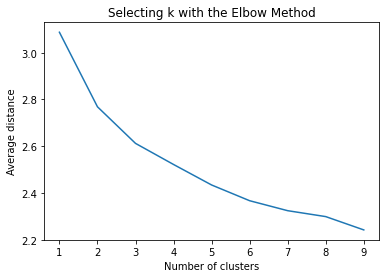

In [7]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

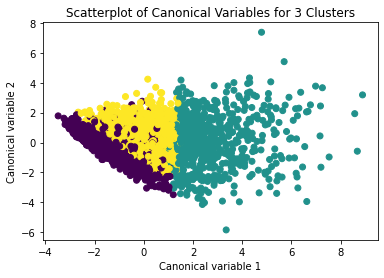

In [8]:
# Interpret 3 cluster solution
model3=KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)
# plot clusters

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()